In [6]:
%load_ext autoreload
%autoreload 2

import os
os.environ["CUDA_VISIBLE_DEVICES"] = '0'

import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('..')
from text_recognizer.models.line_rnn import LineLstm
from text_recognizer.datasets.emnist_lines import EmnistLinesDataset
from training.util import train_model, evaluate_model

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
dataset = EmnistLinesDataset(max_overlap=0.4)
dataset.load_or_generate_data()

EmnistLinesDataset loading data from HDF5...


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 28, 896)           0         
_________________________________________________________________
reshape_7 (Reshape)          (None, 28, 896, 1)        0         
_________________________________________________________________
lambda_4 (Lambda)            (None, 32, 28, 28, 1)     0         
_________________________________________________________________
time_distributed_7 (TimeDist (None, 32, 128)           1198592   
_________________________________________________________________
cu_dnnlstm_3 (CuDNNLSTM)     (None, 2080)              18387200  
_________________________________________________________________
reshape_8 (Reshape)          (None, 32, 65)            0         
_________________________________________________________________
time_distributed_8 (TimeDist (None, 32, 65)            4290      
Total para

/home/sergeyk/.local/share/virtualenvs/fsdl-text-recognizer-6Tfq_pVK/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


('00000000000000000000000000000000', nan)

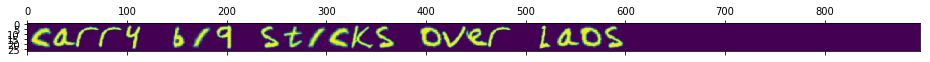

In [9]:
# Why so many params in LSTM?
# Don't forget that is has mayn gates
# 4*(input_dim*lstm_dim + lstm_dim^2 + lstm_dim)

model = LineLstm()
history = train_model(
    model=model.model,
    x_train=dataset.x_train,
    y_train=dataset.y_train,
    epochs=10,
    batch_size=128,
    loss='categorical_crossentropy',
    use_wandb=False
)
evaluate_model(model.model, dataset.x_test, dataset.y_test)
plt.matshow(dataset.x_test[0])
model.predict_on_image(dataset.x_test[0])

In [13]:
# Let's try to overfit on a single batch

model.model.fit(
    dataset.x_train[:128],
    dataset.y_train[:128],
    epochs=10,
    steps_per_epoch=100,
    batch_size=None,
    verbose=1
)

Epoch 1/10
100/100 [==============================] - 24s 238ms/step - loss: 0.8184 - acc: 0.8128
Epoch 2/10
100/100 [==============================] - 24s 238ms/step - loss: 0.5544 - acc: 0.8834
Epoch 3/10
100/100 [==============================] - 24s 239ms/step - loss: 0.3625 - acc: 0.9282
Epoch 4/10
100/100 [==============================] - 24s 240ms/step - loss: 0.2398 - acc: 0.9564
Epoch 5/10
100/100 [==============================] - 24s 241ms/step - loss: 0.1603 - acc: 0.9735
Epoch 6/10
100/100 [==============================] - 24s 240ms/step - loss: 0.1012 - acc: 0.9839
Epoch 7/10
100/100 [==============================] - 24s 240ms/step - loss: 0.0543 - acc: 0.9939
Epoch 8/10
 46/100 [============>.................] - ETA: 12s - loss: 0.0282 - acc: 0.9979

KeyboardInterrupt: 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 896)           0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 896, 1)        0         
_________________________________________________________________
lambda_1 (Lambda)            (None, 32, 28, 28, 1)     0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 32, 128)           1198592   
_________________________________________________________________
cu_dnnlstm (CuDNNLSTM)       (None, 2080)              18387200  
_________________________________________________________________
reshape_2 (Reshape)          (None, 32, 65)            0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, 32, 65)            4290      
Total para

('canrd the aatros  n   ane_______', 0.11916898)

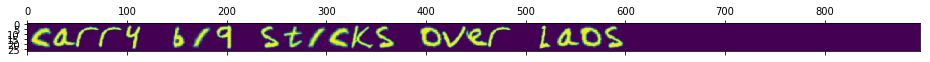

In [4]:
# Now that we know that this model *can* overfit on this data,
# let's see if it can learn

model = LineLstm()
history = train_model(
    model=model.model,
    x_train=dataset.x_train,
    y_train=dataset.y_train,
    epochs=50,
    batch_size=128,
    loss='categorical_crossentropy',
    use_wandb=False
)
evaluate_model(model.model, dataset.x_test, dataset.y_test)
plt.matshow(dataset.x_test[0])
model.predict_on_image(dataset.x_test[0])

In [17]:
dataset.y_train.shape

(10000, 32, 65)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 32, 65)            0         
_________________________________________________________________
time_distributed_11 (TimeDis (None, 32, 65)            4290      
Total params: 4,290
Trainable params: 4,290
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
10000/10000 [==============================] - 1s 107us/step - loss: 3.4693
Epoch 2/10
10000/10000 [==============================] - 1s 76us/step - loss: 2.4957
Epoch 3/10
10000/10000 [==============================] - 1s 78us/step - loss: 2.1584
Epoch 4/10
10000/10000 [==============================] - 1s 78us/step - loss: 2.0117
Epoch 5/10
10000/10000 [==============================] - 1s 78us/step - loss: 1.9039
Epoch 6/10
10000/10000 [==============================] - 1s 78us/step - loss: 1.8098
Epoch 7/10
10000/10